<a href="https://colab.research.google.com/github/nepalprabin/DeepLearning/blob/master/digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [0]:
train=pd.read_csv('/content/drive/My Drive/datasets/train.csv')
test=pd.read_csv('/content/drive/My Drive/datasets/test.csv')

In [7]:
train.shape

(42000, 785)

In [8]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test.shape

(28000, 784)

In [10]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
Y_train=train['label']
X_train=train.drop(labels=['label'],axis=1)

In [12]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

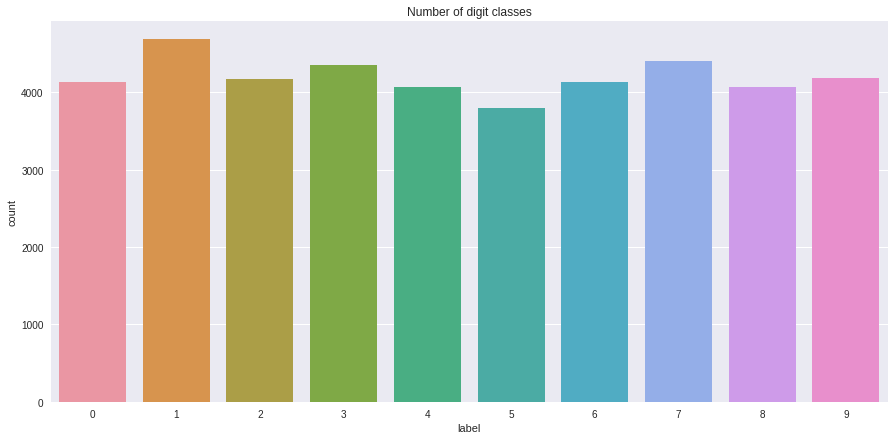

In [13]:
#Visualize the number of digit classes
plt.figure(figsize=(15,7))
fig=sns.countplot(Y_train)
plt.title('Number of digit classes')
Y_train.value_counts()

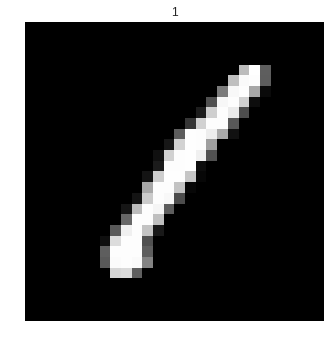

In [14]:
img=X_train.iloc[0].values
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis('off')
plt.show()

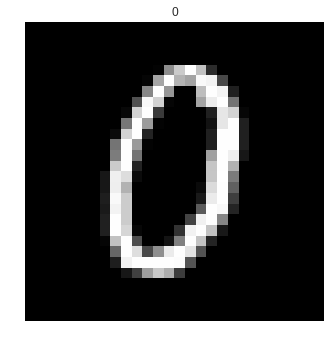

In [15]:
img=X_train.iloc[5].values
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[5,0])
plt.axis('off')
plt.show()

**Normalization, Reshape and Label Encoding**

In [16]:
#Normalize data
X_train=X_train/255.0
test=test/255.0
print("X_train shape:{}".format(X_train.shape))
print("Test shape:{}".format(test.shape))

X_train shape:(42000, 784)
Test shape:(28000, 784)


In [17]:
#Reshape
X_train=X_train.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)
print("X_train shape:{}".format(X_train.shape))
print("Test shape:{}".format(test.shape))

X_train shape:(42000, 28, 28, 1)
Test shape:(28000, 28, 28, 1)


In [20]:
#Label Encoding
import tensorflow as tf
import tensorflow.keras
from keras.utils.np_utils import to_categorical #converts to one_hot_encoding
Y_train=to_categorical(Y_train,num_classes=10)

Using TensorFlow backend.


**Train Test Split**

In [21]:
#Split the train and validation set for training
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.1,random_state=2)
print("X_train shape:{}".format(X_train.shape))
print("Y_train shape:{}".format(Y_train.shape))
print("X_val shape:{}".format(X_val.shape))
print("Y_val shape:{}".format(Y_val.shape))

X_train shape:(37800, 28, 28, 1)
Y_train shape:(37800, 10)
X_val shape:(4200, 28, 28, 1)
Y_val shape:(4200, 10)


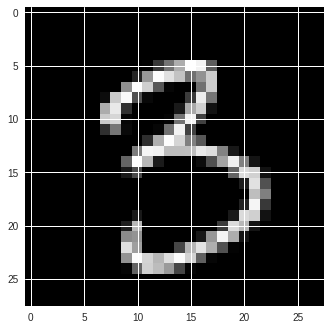

In [25]:
#Plotting some examples
plt.imshow(X_train[9][:,:,0],cmap='gray')
plt.show()

**Convolution Neural Network**

In [0]:
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


In [0]:
model=Sequential()
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=16,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
#Fully Connected
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


In [0]:
#Defining optimizer
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)

In [0]:
#Compiling the model
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
epochs=10
batch_size=250

In [0]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.5, # Randomly zoom image 5%
        width_shift_range=0.5,  # randomly shift images horizontally 5%
        height_shift_range=0.5,  # randomly shift images vertically 5%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [39]:
#Fit the model
history=model.fit_generator(datagen.flow(X_train,Y_train,batch_size=batch_size),
                           epochs=epochs,validation_data=(X_val,Y_val),steps_per_epoch=X_train.shape[0]//batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
151/151 [==============================] - 34s 225ms/step - loss: 2.1907 - acc: 0.1820 - val_loss: 1.7780 - val_acc: 0.4052
Epoch 2/10
151/151 [==============================] - 33s 216ms/step - loss: 1.8909 - acc: 0.3229 - val_loss: 1.1459 - val_acc: 0.7390
Epoch 3/10
151/151 [==============================] - 33s 216ms/step - loss: 1.6947 - acc: 0.4119 - val_loss: 0.8093 - val_acc: 0.8255
Epoch 4/10
151/151 [==============================] - 33s 216ms/step - loss: 1.5811 - acc: 0.4546 - val_loss: 0.6172 - val_acc: 0.8443
Epoch 5/10
151/151 [==============================] - 33s 218ms/step - loss: 1.5090 - acc: 0.4802 - val_loss: 0.5444 - val_acc: 0.8726
Epoch 6/10
151/151 [==============================] - 33s 216ms/step - loss: 1.4540 - acc: 0.5009 - val_loss: 0.4428 - val_acc: 0.8912
Epoch 7/10
151/151 [==============================] - 33s 216ms/step - loss: 1.4004 - acc: 0.5200 - val_loss: 0.4065 - val_acc: 0.8955
Epoch 8

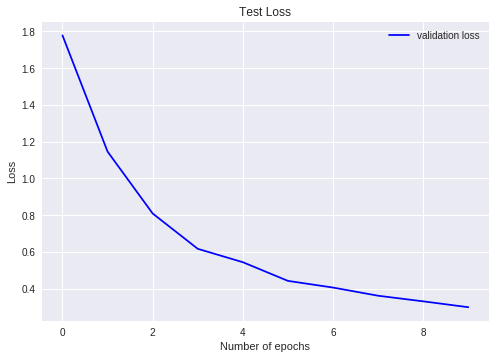

In [40]:
plt.plot(history.history['val_loss'],color='b',label='validation loss')
plt.title('Test Loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

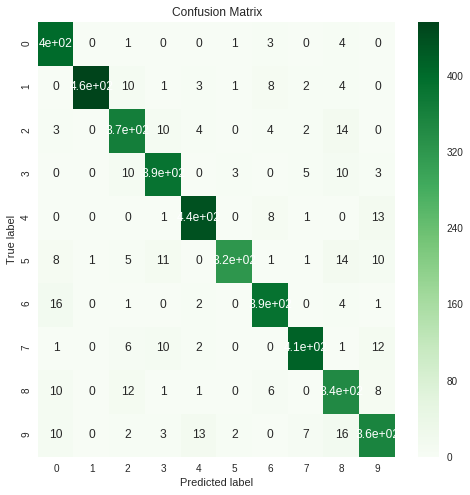

In [44]:
#Prediction
Y_pred=model.predict(X_val)
Y_pred_classes=np.argmax(Y_pred,axis=1)
Y_true=np.argmax(Y_val,axis=1)
confusion_mat=confusion_matrix(Y_true,Y_pred_classes)
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(confusion_mat,annot=True,cmap='Greens',ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [52]:
#Prediciotn on test set
Y_pred_t=model.predict(test)
Y_pred_t

array([[9.6667372e-04, 6.8333048e-07, 9.7782850e-01, ..., 7.0154358e-04,
        5.3847618e-03, 1.8585303e-04],
       [9.6527296e-01, 3.2709660e-05, 6.3946382e-03, ..., 1.4652801e-04,
        6.9235596e-03, 1.6290542e-03],
       [2.4675531e-02, 3.5434554e-04, 4.1868389e-02, ..., 2.0600345e-02,
        1.5909779e-01, 6.6388047e-01],
       ...,
       [1.2230483e-06, 1.5293654e-05, 2.1014176e-02, ..., 6.1781025e-03,
        6.7675358e-04, 1.1917977e-03],
       [1.8299775e-03, 1.9888337e-06, 8.3286164e-04, ..., 1.2165129e-03,
        4.0280186e-03, 9.8848152e-01],
       [1.2061605e-02, 1.2883029e-06, 9.1772544e-01, ..., 3.1130301e-04,
        6.3332096e-02, 9.6621754e-04]], dtype=float32)